# Adult Salary Prediction

## Importing Libraries

In [212]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [213]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [214]:
df.shape

(32561, 15)

In [215]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [217]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- The average capital-gain is 1077.64 but theres a huge range in the capital-gain column. The maximum value is 99999.00 and the minimum value is 0.00. indicating most people have a capital-gain of 0.00 but a few have very large gains.
- The average capital-loss is 87.30 with a huge range from 0.00 to 4356.00. Most people have a capital-loss of 0.00 but a few have very large losses.
- People work an average of 40.4 hours per week. The range is from 1 to 99 hours per week.

## Data Preprocessing

In [218]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [219]:
df.columns = df.columns.str.replace('-', '_').str.replace(' ', '').str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

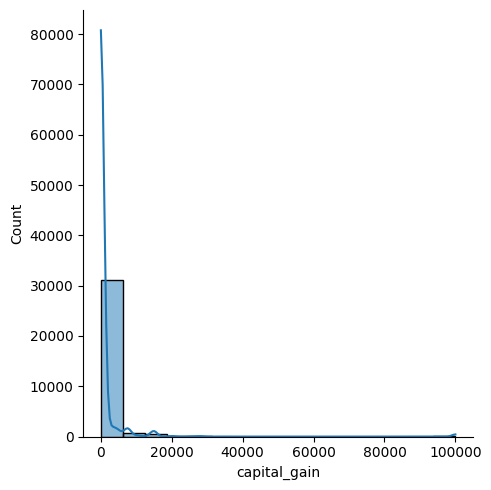

In [220]:
sns.displot(df['capital_gain'], kde=True)

In [221]:
# df.loc[df['capital_gain']==0, 'capital_gain'] = np.nan
# df.capital_gain = np.log(df.capital_gain)
# df.loc[df['capital_gain']==0, 'capital_gain'] = np.nan

In [222]:
df.capital_gain = df.capital_gain.replace(0, np.nan)

In [223]:
df.capital_gain = np.log(df.capital_gain)

In [224]:
df.fillna({'capital_gain': 0}, inplace=True)

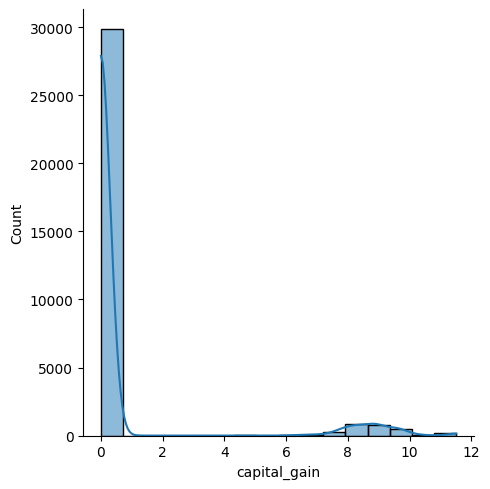

In [225]:
sns.displot(df['capital_gain'], kde=True)

In [226]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [227]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing outliers from hours_per_week column

There are obviously outliers in the hours_per_week column. The maximum value is 99 hours per week which is not possible. We will remove these outliers.

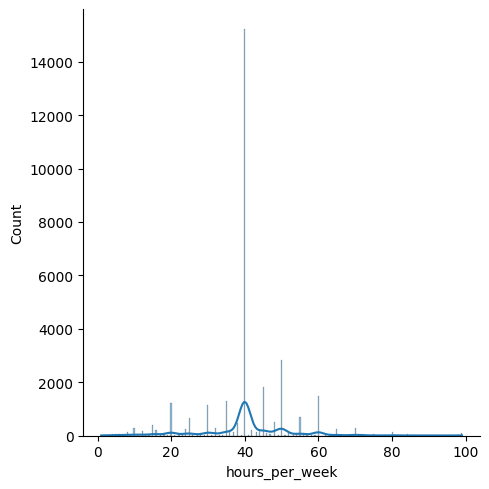

In [228]:
sns.displot(df['hours_per_week'], kde=True)

<Axes: ylabel='hours_per_week'>

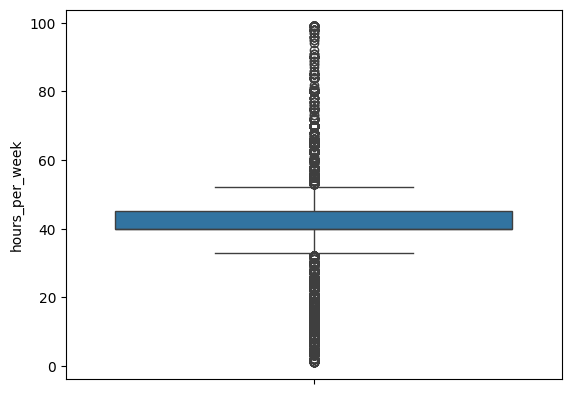

In [229]:
sns.boxplot(df['hours_per_week'])

In [230]:
IQR = df.hours_per_week.quantile(0.75) - df.hours_per_week.quantile(0.25)
lower_range = df.hours_per_week.quantile(0.25) - (IQR * 1.5)
upper_range = df.hours_per_week.quantile(0.75) + (IQR * 1.5)
lower_range, upper_range

(np.float64(32.5), np.float64(52.5))

In [231]:
df.hours_per_week = df.hours_per_week.astype('float64')
df['hours_per_week'].dtype

dtype('float64')

In [232]:
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

<Axes: ylabel='hours_per_week'>

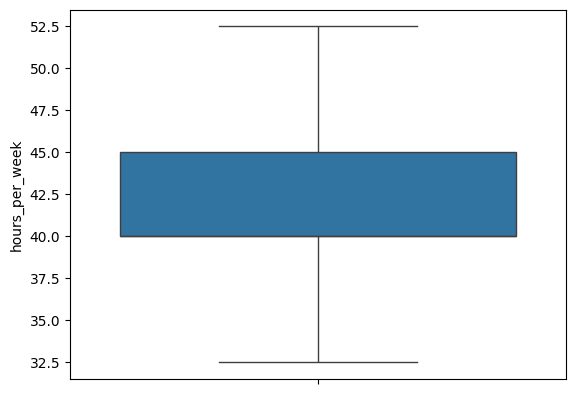

In [234]:
sns.boxplot(df['hours_per_week'])

## Removing outliers from education_num column

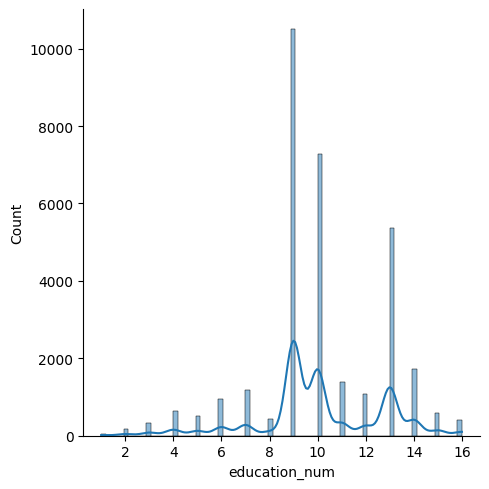

In [235]:
sns.displot(df.education_num, kde=True)

<Axes: xlabel='education_num'>

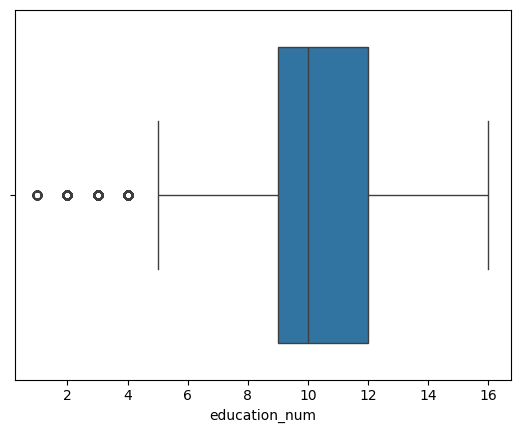

In [240]:
sns.boxplot(df['education_num'], orient='h')

In [241]:
IQR = df.education_num.quantile(0.75) - df.education_num.quantile(0.25)
lower_range = df.education_num.quantile(0.25) - (IQR * 1.5)
upper_range = df.education_num.quantile(0.75) + (IQR * 1.5)
lower_range, upper_range

(np.float64(4.5), np.float64(16.5))

In [243]:
df.hours_per_week = df.hours_per_week.astype('float64')
df['education_num'].dtype

dtype('float64')

In [244]:
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

<Axes: xlabel='education_num'>

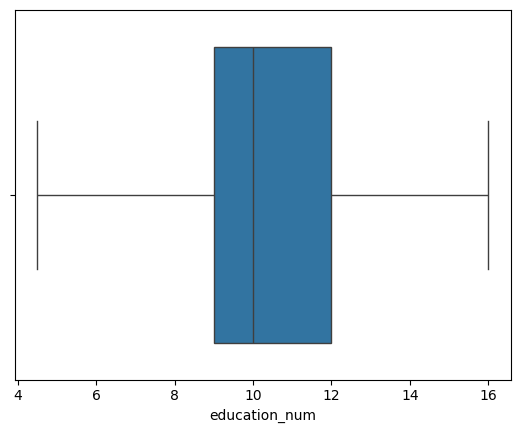

In [245]:
sns.boxplot(df['education_num'], orient='h')